# 시계열 자료 읽기

url : https://goo.gl/o6Dwi3

## 1. 영국 왕들의 사망 데이터

우선 시계열 분석을 위해 피룡한 라이브러리를 설치한다. 설치 완료 후 웹에서 데이터를 불러온다.
- `install.packages("teseries")`
- `install.packages("TTR")`
- `install.packages("forecast")`

In [1]:
install.packages("teseries")

Installing package into 'C:/Users/jang/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'teseries' is not available (for R version 3.5.1)"

In [2]:
install.packages("TTR")

Installing package into 'C:/Users/jang/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'xts', 'zoo'



package 'xts' successfully unpacked and MD5 sums checked
package 'zoo' successfully unpacked and MD5 sums checked
package 'TTR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jang\AppData\Local\Temp\Rtmpgh80Va\downloaded_packages


In [3]:
install.packages("forecast")

Installing package into 'C:/Users/jang/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'quadprog', 'quantmod', 'fracdiff', 'lmtest', 'timeDate', 'tseries', 'urca', 'uroot', 'RcppArmadillo'



package 'quadprog' successfully unpacked and MD5 sums checked
package 'quantmod' successfully unpacked and MD5 sums checked
package 'fracdiff' successfully unpacked and MD5 sums checked
package 'lmtest' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'tseries' successfully unpacked and MD5 sums checked
package 'urca' successfully unpacked and MD5 sums checked
package 'uroot' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jang\AppData\Local\Temp\Rtmpgh80Va\downloaded_packages


## 2. Convert Timeseries

시계열 분석을 위한 패키지로 TTR과 forecast를 이용한다.
- scan() 함수로 영궁 왕들의 사망시 나이 데이터를 가져옴
- 시계열 자료 형식으로 변환하기 위해 ts() 함수 사용
- 사망 나이에는 특별한 주기가 없으므로 frequcency를 기본값 1로 설정

In [27]:
library(TTR)
library(forecast)

In [1]:
# 데이터 로드
kings = scan('http://robjhyndman.com/tsdldata/misc/kings.dat', skip=3)
kingstimeseries = ts(kings)

In [5]:
# kings 데이터 확인
kings
str(kings)

[1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

 num [1:42] 60 43 67 50 56 42 50 65 68 43 ...


In [6]:
# 변환 데이터 확인
kingstimeseries
str(kingstimeseries)

Time Series:
Start = 1 
End = 42 
Frequency = 1 
 [1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

 Time-Series [1:42] from 1 to 42: 60 43 67 50 56 42 50 65 68 43 ...


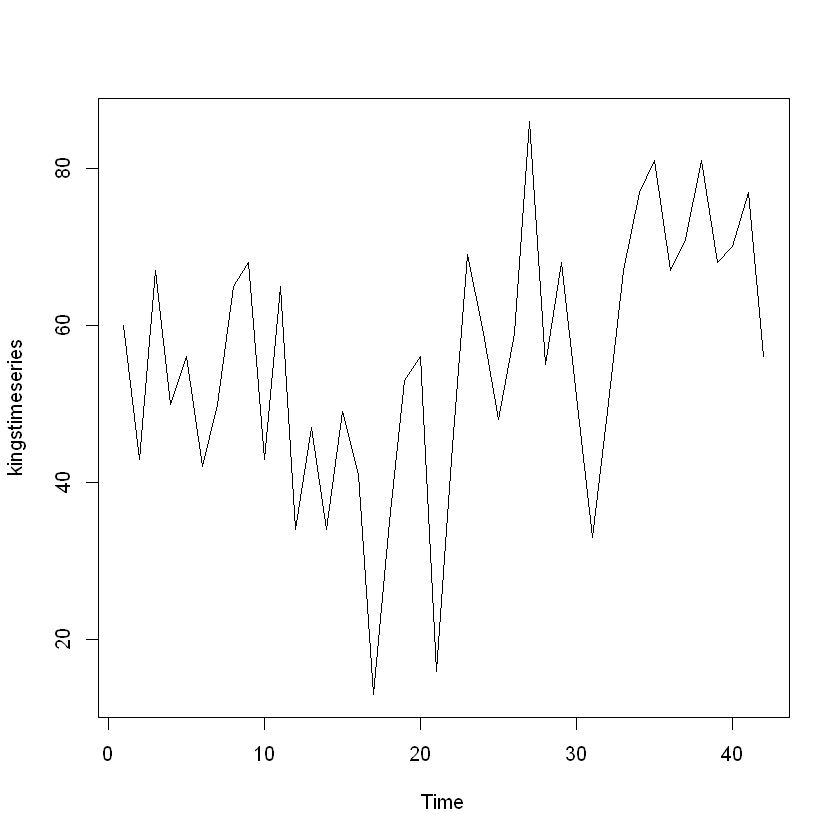

In [8]:
# 그래프로 출력
plot(kingstimeseries)

- 20번째 왕 이후로 수명이 증가함
- 후반부 40번째 왕은 대략 70 정도까지 생존

----

## 3. MA 모형

TTR 패키지의 SMA 기능을 사용한다. 그래프를 좀더 완만하게 그리기 위해 3년, 8년 마다 평균을 계산한다.
- 그래프를 보면 평균이 일정치 않음을 확인 가능

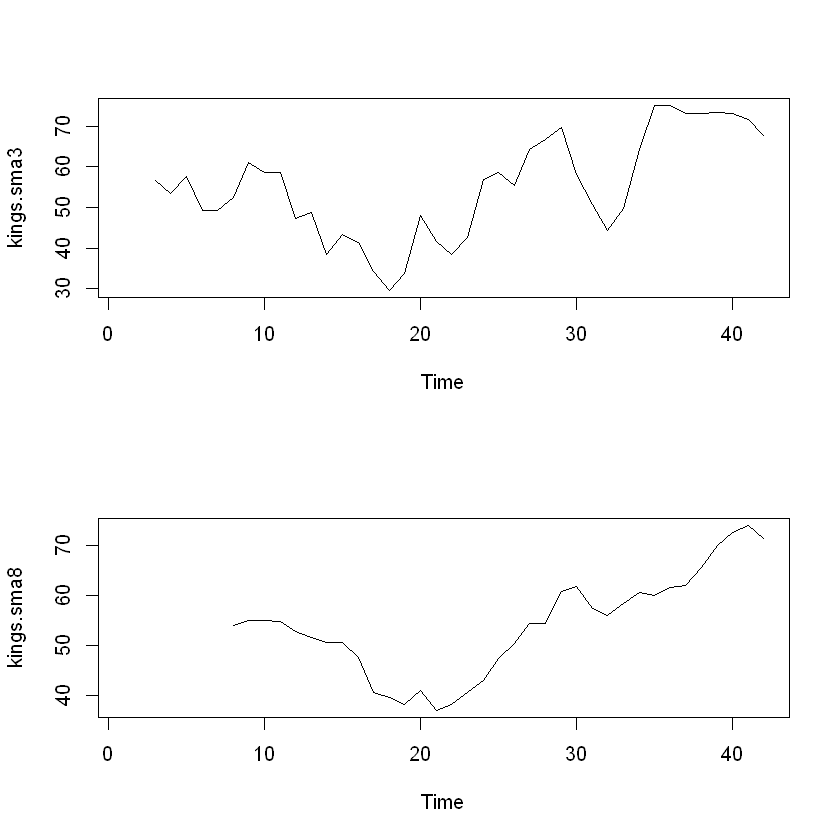

In [13]:
kings.sma3 <- SMA(kingstimeseries, n=3)
kings.sma8 <- SMA(kingstimeseries, n=8)

par(mfrow=c(2,1))
plot(kings.sma3)
plot(kings.sma8)

----

## ARIMA 모형

ARIMA모형은 정상성시계열에 한해 사용하며 비정상시계열은 차분을 통해 정상성으로 변환한다. 
- 1차 차분 : 평균과 분산이 시간에 의존하지 않음을 그래프를 통해 확인

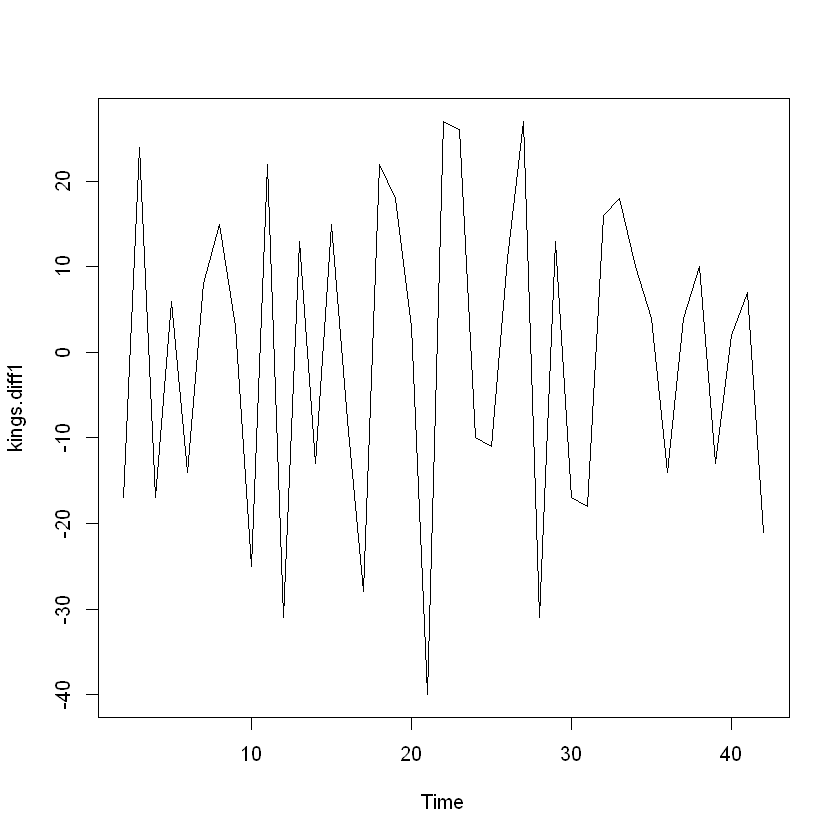

In [22]:
# 1차 차분
kings.diff1 <- diff(kingstimeseries, differences = 1)
plot(kings.diff1)

- 분산이 비교적 일정해보이니 ARMIA 모형 적용 가능
- ACF와 PACF를 통해 적합한 ARIMA 모형 검색 필요
- 정상성을 가지니 ARMIA(p,1,q)임을 확인, 그러므로 p, q를 찾아야함.

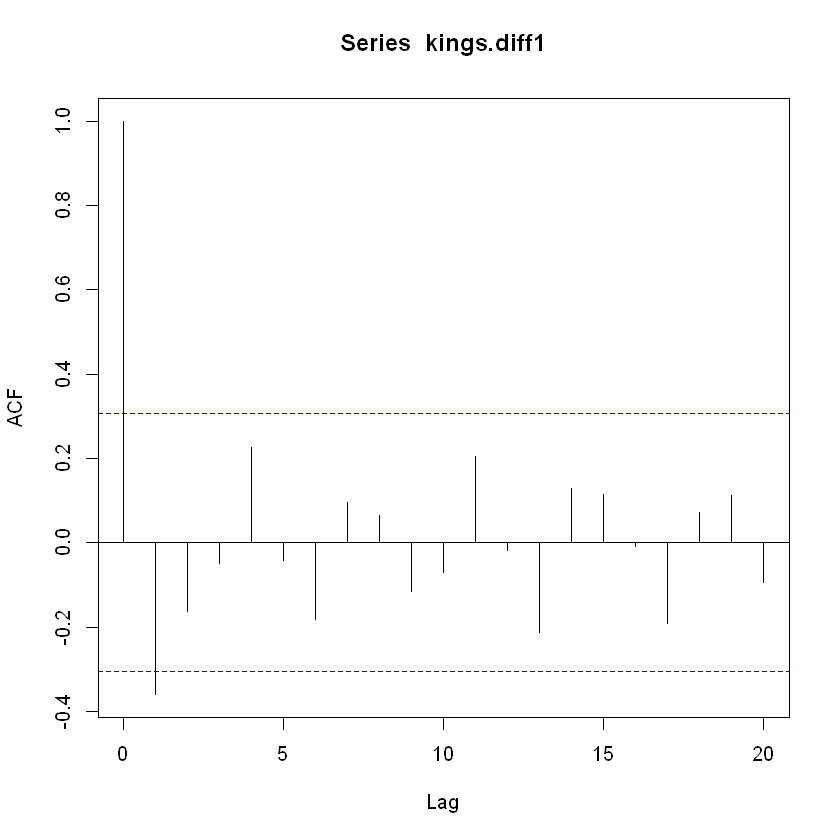

In [23]:
# ACF 그래프 
# 구간을 20으로 설정
acf(kings.diff1, lag.max=20)  

- 1 시점까진 점선 위로 나오지만 2시점 부터는 줄어듬
- q=1일 가능성이 높음

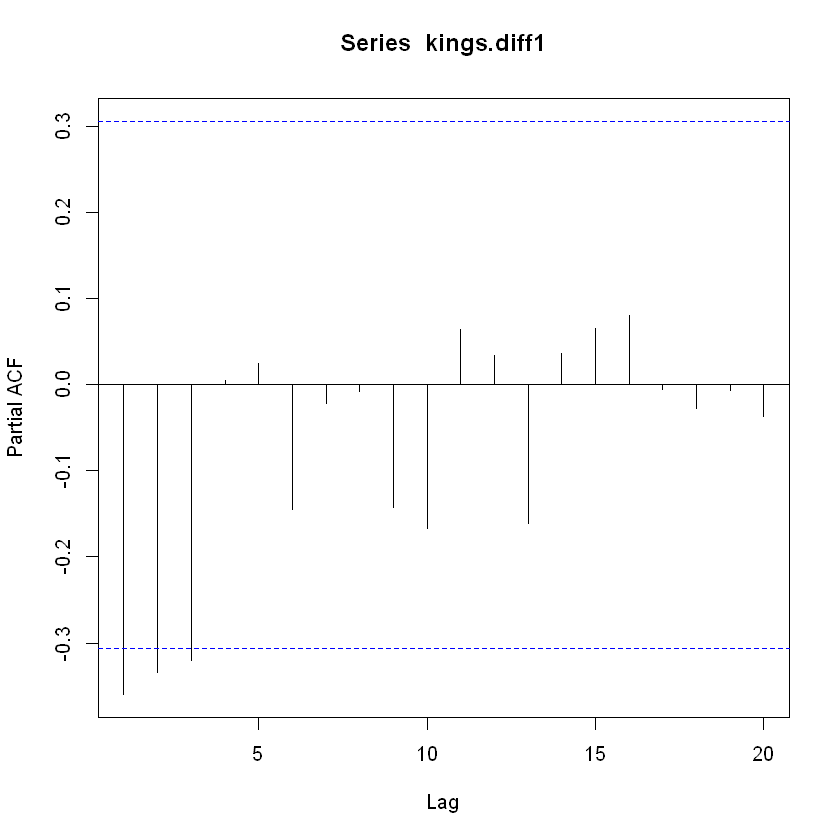

In [24]:
# PACF 그래프 확인
pacf(kings.diff1, lag.max=20)

- 1,2,3까지는 점선 밖으로 나오지만 4부터는 나오지 않음
- p는 3일 확률이 노음
- 후보는 ARIMA(3,0), ARIMA(0,1)이고 1번 차분했으므로 d=1
- 정리하면 ARIMA(3,1,0), ARIMA(0,1,1) 2개의 모델을 생성

In [25]:
# 적합한 ARMIA 모형 찾기
# ACG 확인 절단점 : 2
kings.arima <- auto.arima(kingstimeseries)
kings.arima

Series: kingstimeseries 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.7218
s.e.   0.1208

sigma^2 estimated as 236.2:  log likelihood=-170.06
AIC=344.13   AICc=344.44   BIC=347.56

----

## Analysis

초기 데이터를 통해 분석해본다.

In [30]:
king.forecasts <- forecast(kings.arima)
king.forecasts

   Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
43       67.75063 48.05479 87.44646 37.62845  97.87281
44       67.75063 47.30662 88.19463 36.48422  99.01703
45       67.75063 46.58489 88.91637 35.38042 100.12084
46       67.75063 45.88696 89.61429 34.31304 101.18822
47       67.75063 45.21064 90.29062 33.27869 102.22257
48       67.75063 44.55402 90.94723 32.27448 103.22678
49       67.75063 43.91549 91.58577 31.29793 104.20333
50       67.75063 43.29362 92.20763 30.34687 105.15439
51       67.75063 42.68718 92.81408 29.41939 106.08187
52       67.75063 42.09507 93.40619 28.51383 106.98742

- 분석 결과 43번째부터 52번째까지 예측됨
- 첫번째 칼럼이 Time, 두번째 칼럼이 Point Forcasts
- 그 뒤는 각각 80%, 95%의 신뢰구간의 값들이 표시

In [32]:
king.forecasts.table <- as.data.frame(king.forecasts)
king.forecasts.table

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95
43,67.75063,48.05479,87.44646,37.62845,97.87281
44,67.75063,47.30662,88.19463,36.48422,99.01703
45,67.75063,46.58489,88.91637,35.38042,100.12084
46,67.75063,45.88696,89.61429,34.31304,101.18822
47,67.75063,45.21064,90.29062,33.27869,102.22257
48,67.75063,44.55402,90.94723,32.27448,103.22678
49,67.75063,43.91549,91.58577,31.29793,104.20333
50,67.75063,43.29362,92.20763,30.34687,105.15439
51,67.75063,42.68718,92.81408,29.41939,106.08187
52,67.75063,42.09507,93.40619,28.51383,106.98742


----